# Avacado price study

## Data description 

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

1.Date - The date of the observation
2.AveragePrice - the average price of a single avocado
3.type - conventional or organic
4.year - the year
5.Region - the city or region of the observation
6.Total Volume - Total number of avocados sold
7.4046 - Total number of avocados with PLU 4046 sold
8.4225 - Total number of avocados with PLU 4225 sold
9.4770 - Total number of avocados with PLU 4770 sold

## Importing modules

In [209]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Reading csv file

In [134]:
df = pd.read_csv('Avacado.csv', index_col=[0])
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 14
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   int64  
 12  region        1517 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 165.9+ KB


In [136]:
df.shape

(1517, 13)

In [137]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


Breaking down the date column into two new column date and month.

In [138]:
df.Date = pd.to_datetime(df.Date)
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

In [139]:
df.drop('Date', axis=1, inplace=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11


## Checking null values 

In [140]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Day             0
Month           0
dtype: int64

<AxesSubplot:>

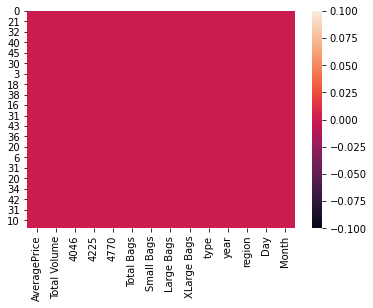

In [141]:
sns.heatmap(df.isnull())

## Visualization

### Dependent variable (Average price)

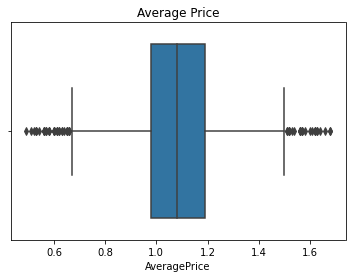

In [142]:
plt.title('Average Price')
sns.boxplot(df['AveragePrice'])
plt.show()

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

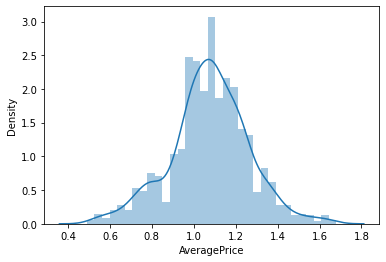

In [143]:
sns.distplot(df['AveragePrice'])

Here we can see that the average price is mostly distributed between 1.0 to 1.2.

### Independent variable

Checking in which year sale of avacado has the most aaverage price

In [144]:
df['year'].unique()

array([2015, 2016], dtype=int64)

<AxesSubplot:xlabel='year'>

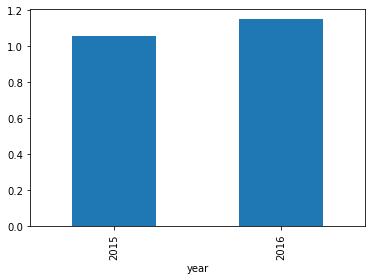

In [145]:
year_group = df.groupby('year').mean()
year_group['AveragePrice'].plot(x=df.year, kind='bar')

As we can see here the mean of the average price in 2016 is slightly greater than 2015

In [146]:
region_group = df.groupby('region', as_index=False)['AveragePrice'].mean()
region_group = region_group.sort_values(by='AveragePrice', ascending=False)

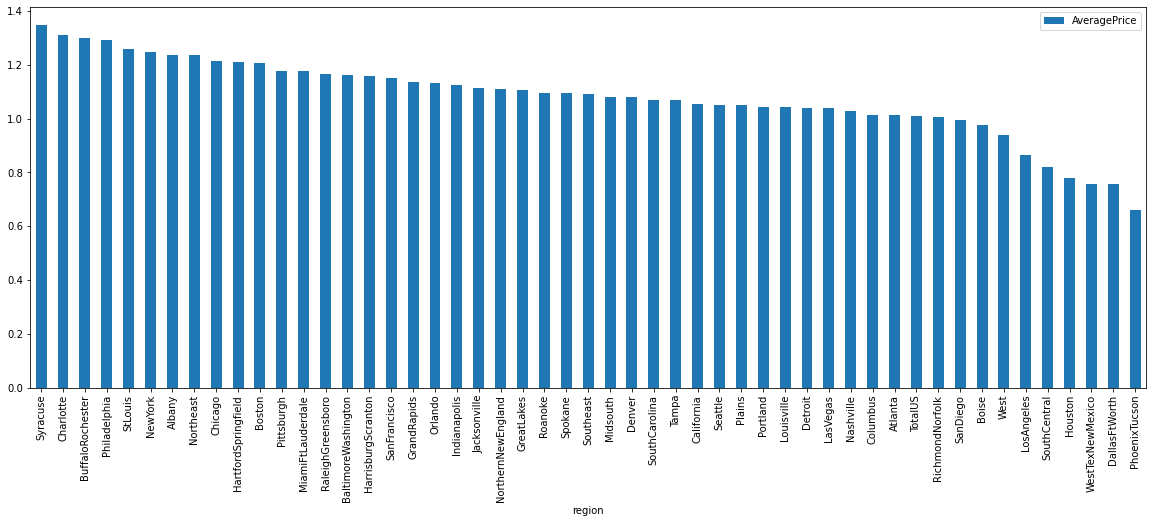

In [147]:
region_group.plot(x='region', y='AveragePrice', kind='bar', figsize=(20,7))
plt.xticks(rotation=90)
plt.show()

As we can the average price maximum in Syracuse.

In [148]:
tv_group = df.groupby('region', as_index=False)['Total Volume'].max()

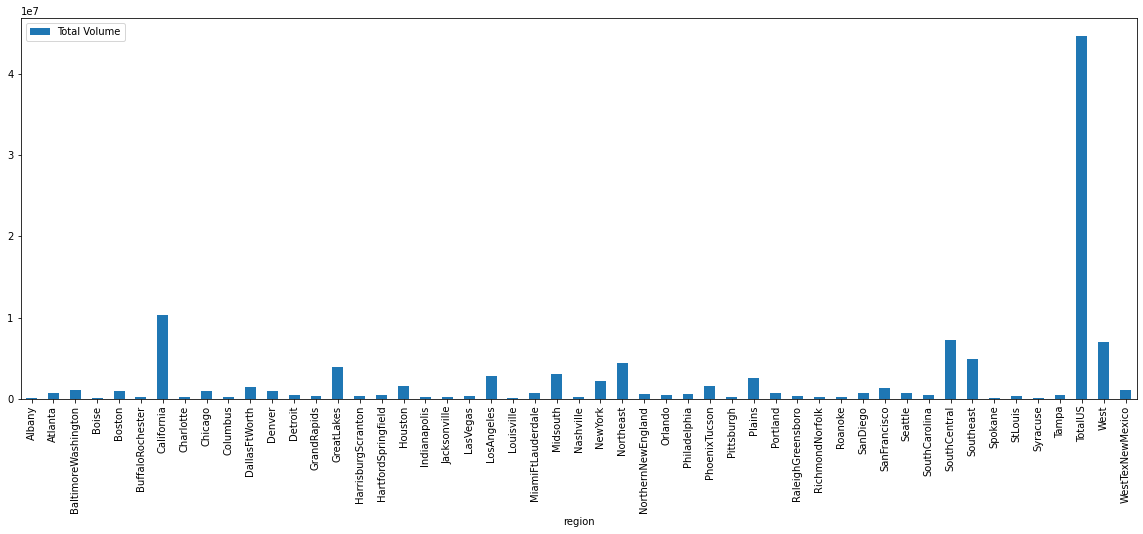

In [149]:
tv_group.plot(x='region', y='Total Volume', kind='bar', figsize=(20,7))
plt.xticks(rotation=90)
plt.show()

The number of avacado sold in TotalUS is maximum.

Text(0.5, 1.0, 'Average price by year')

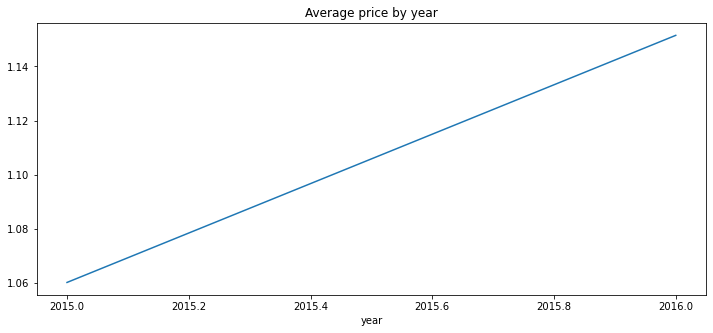

In [150]:
date_group = df.groupby('year').mean()
ifg, ax = plt.subplots(figsize=(12,5))
date_group['AveragePrice'].plot(x = df.year)
plt.title('Average price by year')

Text(0.5, 1.0, 'Average Price by Month')

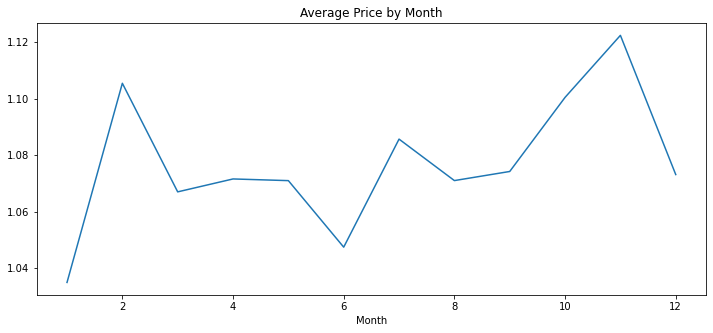

In [151]:
date_group = df.groupby('Month').mean()
fig, ax = plt.subplots(figsize=(12,5))
date_group['AveragePrice'].plot(x = df.Month)
plt.title('Average Price by Month')

Text(0.5, 1.0, 'Average price by day')

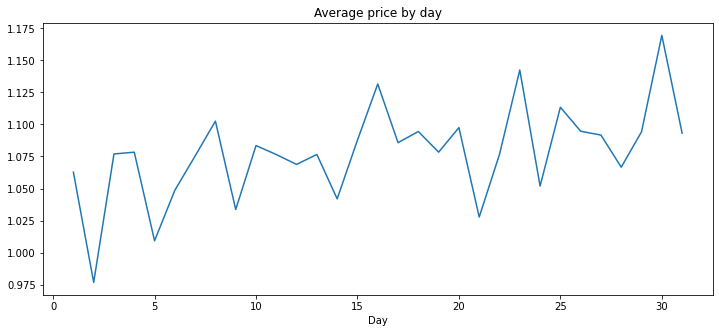

In [152]:
date_group = df.groupby('Day').mean()
fig, ax = plt.subplots(figsize=(12,5))
date_group['AveragePrice'].plot(x = df.Day)
plt.title('Average price by day')

## Data Cleaning 

In [153]:
df['type'].value_counts()

conventional    1517
Name: type, dtype: int64

Here we can see that there is only one type of value is present in the 'type' column. So we will delete the type column.

In [154]:
df.drop('type', axis=1, inplace=True)

In [155]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,29,11


### Checking for correlation

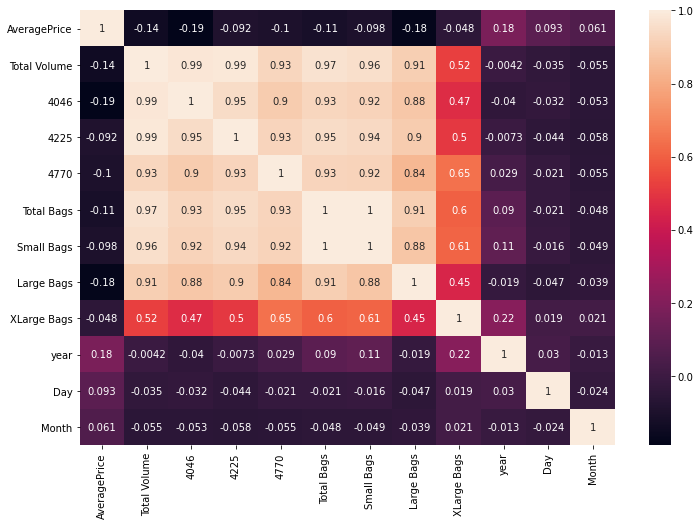

In [156]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

Here we can see that average price is not correlated with any of the variable.

### Checking Outliers

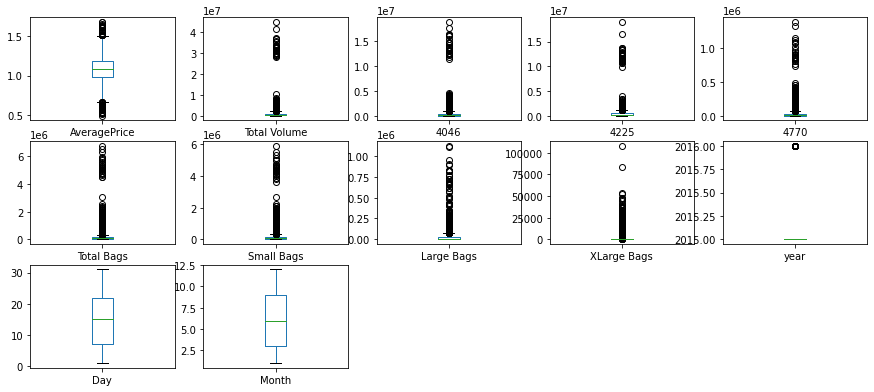

In [159]:
df.plot(kind='box', subplots=True, layout=(5,5), sharex=False, legend=False, figsize=(15,11))
plt.show()

We are removing the outlier with upper whisker and lower whisker values

In [160]:
from scipy import stats
def remove_outlier(df):
    for col in df.columns:
        if((df[col].dtype == 'float64') | (df[col].dtype == 'float64')):
            percentile = df[col].quantile([0.25, 0.75]).values
            Q1 = percentile[0]
            Q3 = percentile[1]
            IQR = stats.iqr(df[col], interpolation='midpoint')
            up_lim = Q3+1.5*IQR
            low_lim = Q1-1.5*IQR
            df[col] = np.where(df[col] < low_lim, Q1, df[col])
            df[col] = np.where(df[col] > up_lim, Q3, df[col])
        else:
            df[col] = df[col]
    return df

final_df = remove_outlier(df)

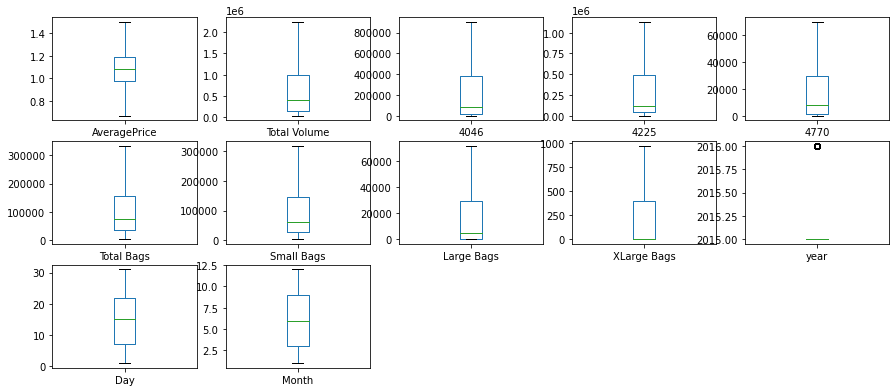

In [161]:
final_df.plot(kind='box', subplots=True, layout=(5,5), sharex=False, legend=False, figsize=(15,11))
plt.show()

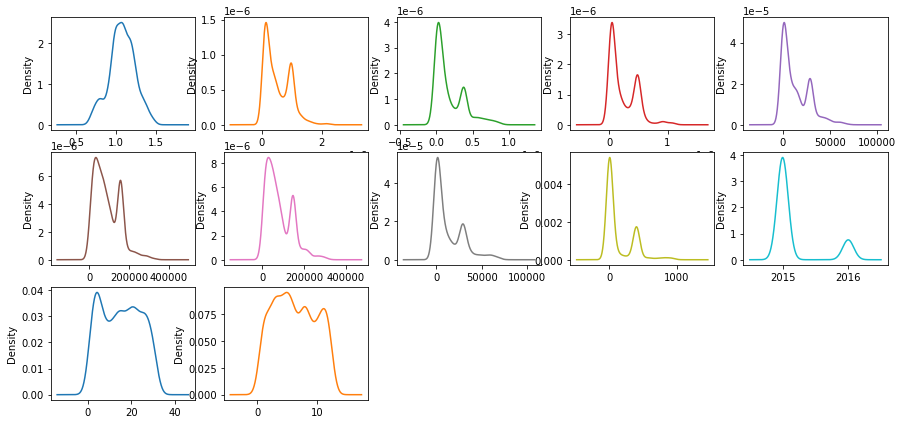

In [162]:
final_df.plot(kind='density', subplots=True, layout=(5,5), legend=False, sharex=False, figsize=(15,12))
plt.show()

In [163]:
final_df.skew()

AveragePrice   -0.126463
Total Volume    0.791720
4046            1.290157
4225            1.096937
4770            1.078070
Total Bags      0.811575
Small Bags      0.988115
Large Bags      1.299244
XLarge Bags     1.507992
year            1.828332
Day             0.041303
Month           0.101439
dtype: float64

Here we can see that all the skewness values lies between -/+ 3. So the skewness is acceptable.

### Coverting the region column into categorical using one hot encoding. 

In [164]:
region = pd.get_dummies(df.region)
region

,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,Columbus,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
merged = pd.concat([final_df, region], axis='columns')
merged.drop('region', axis=1, inplace=True)

In [166]:
merged

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,...,0,0,0,0,0,0,0,0,0,0
11,1.19,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,...,0,0,0,0,0,0,0,0,0,0
12,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,...,0,0,0,0,0,0,0,0,0,0
13,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,...,0,0,0,0,0,0,0,0,0,0


## Model Building

In [173]:
x = merged.drop('AveragePrice', axis=1)

In [175]:
y = merged['AveragePrice']

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [184]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

R2: 0.6151223374792552
MAE: 0.07855226501750501
MSE: 0.010803683460270753
RMSE: 0.10394076899980466


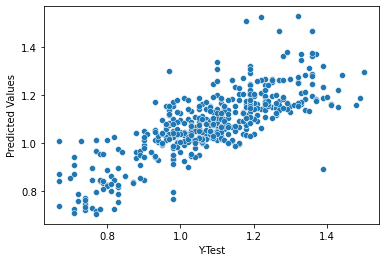

In [219]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
sns.scatterplot(y_test,predlr)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")
print('R2: {}'.format(metrics.r2_score(y_test, predlr)))
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predlr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predlr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predlr))))

R Square: 0.5142779312280212
MAE: 0.08173245614035088
MSE: 0.013634429824561404
RMSE: 0.11676656124319755


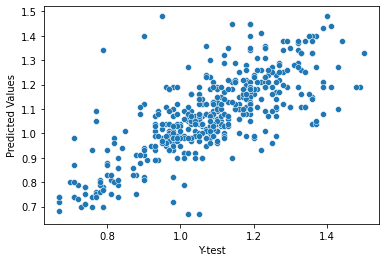

In [220]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
preddtr = dtr.predict(x_test)
sns.scatterplot(y_test, preddtr)
plt.xlabel('Y-test')
plt.ylabel('Predicted Values')
print('R Square: {}'.format(metrics.r2_score(y_test, preddtr)))
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, preddtr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, preddtr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, preddtr))))

R Square: 0.7265369393580856
MAE: 0.06474298245614032
MSE: 0.0076762271052631635
RMSE: 0.08761408051941859


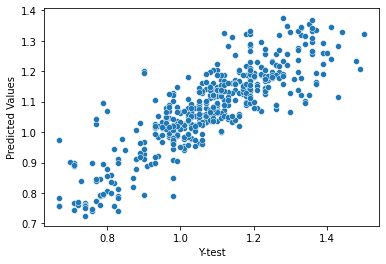

In [221]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
predrfr = rfr.predict(x_test)
sns.scatterplot(y_test, predrfr)
plt.xlabel('Y-test')
plt.ylabel('Predicted Values')
print('R Square: {}'.format(metrics.r2_score(y_test, predrfr)))
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predrfr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predrfr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predrfr))))

Here we can see that our RandomForestRegressor performs well as it has the most lowest metric scores among all the three model and higher r2_score

## Performing Cross validation

In [222]:
scr = cross_val_score(lr, x, y, cv=5, scoring='r2')
print("Cross validation score for Linear Regression:", scr.mean())

Cross validation score for Linear Regression: -0.17213878051353038


In [223]:
scr = cross_val_score(dtr, x, y, cv=5, scoring='r2')
print("Cross validation score for Decision Tree Regressor:", scr.mean())

Cross validation score for Decision Tree Regressor: -0.3277770078142775


In [224]:
scr = cross_val_score(rfr, x, y, cv=5, scoring='r2')
print("Cross validation score for Random Forest Regressor:", scr.mean())

Cross validation score for Random Forest Regressor: 0.2807889631552407


In cross validation our Random Forest Regressor performs well, so we will select RandomForestRegressor for HyperParameter Tuning.

## Hyperparameter tuning 

In [234]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 20, num = 6)]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}

In [235]:
from sklearn.model_selection import GridSearchCV

In [236]:
GCV = GridSearchCV(RandomForestRegressor(), random_grid, cv=5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 8, 11, 14, 17, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'n_estimators': [100, 136, 172, 209, 245, 281, 318,
                                          354, 390, 427, 463, 500]})

In [237]:
GCV.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 500}

In [238]:
rfrGCV = RandomForestRegressor(max_depth=20, max_features='auto', min_samples_leaf=1, n_estimators=500)
rfrGCV.fit(x_train, y_train)
predGCV = rfrGCV.predict(x_test)
print('R square:', metrics.r2_score(y_test, predGCV))

R square: 0.7234210864440218


## Checking how much our predictions are correct 

In [243]:
prediction = pd.DataFrame({"Predictions":predGCV, "Real Value":y_test})

In [244]:
prediction.round(2)

,Predictions,Real Value
38,0.74,0.83
47,1.13,1.10
18,1.07,1.08
25,1.32,1.18
6,1.23,1.19
...,...,...
12,1.10,1.19
17,1.17,1.13
8,0.89,0.71
37,1.30,1.13


## Saving our model

In [246]:
import joblib
joblib.dump(rfr, 'avacado.pkl')

['avacado.pkl']

## Loading our saved model

In [247]:
save = joblib.load('avacado.pkl')
prediction = save.predict(x_test)
print('R square: {}'.format(metrics.r2_score(y_test, prediction)))
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, prediction)))
print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, prediction)))
print('Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, prediction))))

R square: 0.7265369393580856
Mean Absolute Error: 0.06474298245614032
Mean Squared Error: 0.0076762271052631635
Root Mean Squared Error: 0.08761408051941859
